# Project Titanic


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href='#FMV'>DataPreprocessing</a></li>
<li><a href='#model'>Modelling</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset captures information on the people who travelled on the RMS Titanic. This dataset has be taken from the Kaggle Competition - https://www.kaggle.com/c/titanic

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [102]:
# Use this cell to set up import statements for all of the packages that you plan to use.

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

<a id='wrangling'></a>
## Data Wrangling

### 1. General Properties
#### 1.1 Load the data
Load both the training and testing csv file into a dataframe using pandas

In [108]:
titanicTrain = pd.read_csv('train.csv')
display(titanicTrain.head())

titanicTest = pd.read_csv('test.csv')
display(titanicTest.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### 1.2 Check contents of columns

Here we check the unique values in each columns to understand more about the data. Also we will check for the data types missing vales, mean, count etc.

In [57]:
print("Survived :  {}".format(titanicTrain.Survived.unique()))
print("Pclass :  {}".format(titanicTrain.Pclass.unique()))
#print("Name :  {}".format(titanicTrain.Name.unique()))
print("Sex :  {}".format(titanicTrain.Sex.unique()))
print("Age :  {}".format(titanicTrain.Age.unique()))
print("SibSp :  {}".format(titanicTrain.SibSp.unique()))
print("Parch :  {}".format(titanicTrain.Parch.unique()))
#print("Ticket :  {}".format(titanicTrain.Ticket.unique()))
print("Fare :  {}".format(titanicTrain.Fare.unique()))
#print("Cabin :  {}".format(titanicTrain.Cabin.unique()))
print("Embarked :  {}".format(titanicTrain.Embarked.unique()))
#print("PassengerId :  {}".format(titanicTrain.PassengerId.unique()))

Survived :  [0 1]
Pclass :  [3 1 2]
Sex :  ['male' 'female']
Age :  [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
SibSp :  [1 0 3 4 2 5 8]
Parch :  [0 1 2 5 3 4 6]
Fare :  [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792

In [58]:
# Find count, mean etc
display(titanicTrain.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
# DataTypes and null columns
print("Train DataTypes : \n")
print(titanicTrain.info())

print("\n\nTest DataTypes : \n")
print(titanicTest.info())

Train DataTypes : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


Test DataTypes : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

<a id='eda'></a>
## Exploratory Data Analysis
Here we will plot graph of count of people who survived and died  for each feature.

- Pclass : It is pretty evident that people travelled in 1st class had higher chance of survival compared to lower class.
- Sex  : Females had a higher chance of survival than men
- Parch : Parch with values 1,2 and 3 seems to have a higher rate of survival than others.
- Embarked : Embarked 'C' has a better survival rates than other 2 .
- Cabin  : looks like cabin B,C,D,E,F has better survival rates.
- Age : people with age less than 20 survived more.
etc.


In [60]:
def barchart(indf, incolumn) : 
    dlt = []
    ilt = []
    for element in indf[incolumn].unique() : 
        x = indf[indf[incolumn] == element]['Survived'].value_counts()
        dlt.append(x)
        ilt.append(element)
    df1 = pd.DataFrame(dlt)
    df1.index = ilt
    df1.columns = ['Dead', 'Survived']
    df1.plot(kind='bar',stacked=False, figsize=(10,3), logy=True)

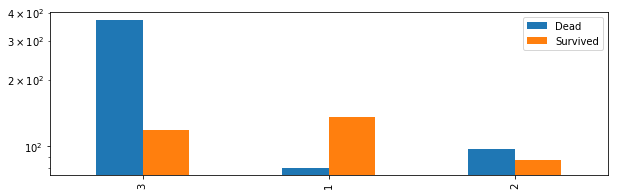

In [61]:
barchart(titanicTrain, 'Pclass')

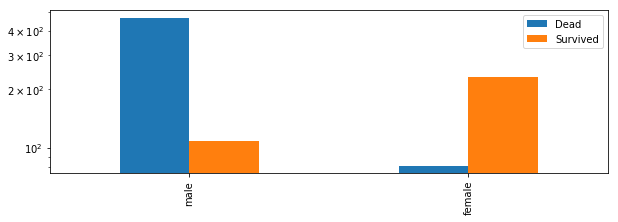

In [62]:
barchart(titanicTrain, 'Sex')

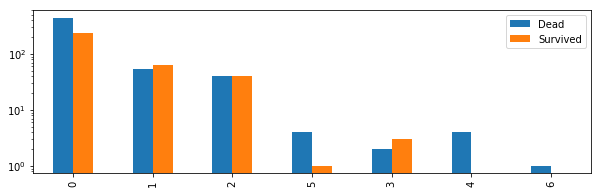

In [63]:
barchart(titanicTrain, 'Parch')

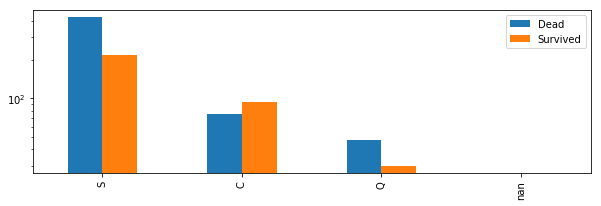

In [64]:
barchart(titanicTrain, 'Embarked')

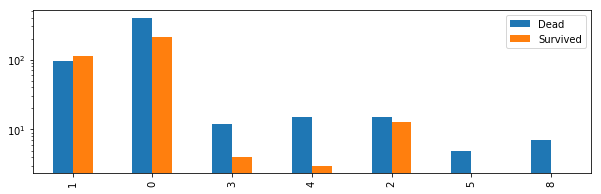

In [65]:
barchart(titanicTrain, 'SibSp')

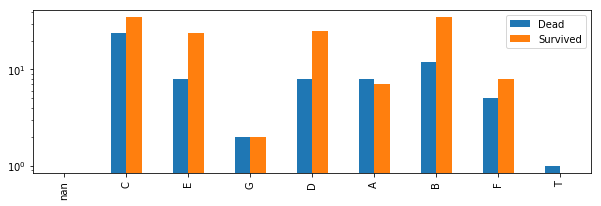

In [83]:
titanicTrain['Cabin1'] = titanicTrain['Cabin'].str.extract('([A-Za-z])',expand=False)
barchart(titanicTrain, 'Cabin1')
titanicTrain = titanicTrain.drop(['Cabin1'], axis=1)

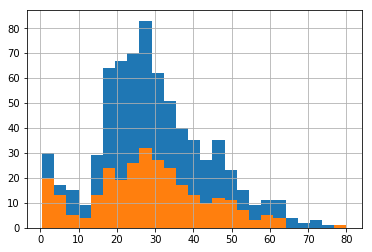

In [67]:
ax = titanicTrain['Age'].hist(bins = 25)
ax1 = titanicTrain[titanicTrain.Survived == 1]['Age'].hist(bins = 25)

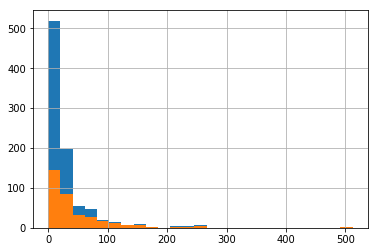

In [68]:
ax = titanicTrain['Fare'].hist(bins = 25)
ax1 = titanicTrain[titanicTrain.Survived == 1]['Fare'].hist(bins = 25)

<a id='DP'></a>
## DataPreprocessing

Here we will be combining both test and train data and do the following :
- Remove the columns that are not required for the modelling
- Fill the missing values
- Do one-hot encoding to convert categorical data into multiple columns
- Data Normalization

### check for null values
Here we check the count of null(nan) values in each column of training set.
- 177 null values for Age.
- 2 in Embarked 
- 687 for cabin.

In [69]:
titanicTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin1         687
dtype: int64

Here we check the count of null(nan) values in each column of testing set.
- 86 null values for Age.
- 1 null in Fare.
- 327 null in Cabin.

In [74]:
titanicTest.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Combine Datasets

There are missing values in both training and testing set. So lets combine both the sets, so that we can do data processing on both the sets.

In [109]:
#Insert column Survived 
titanicTest.insert(1,'Survived',3)


#concatinate test and training set
combinedTitanic =  pd.concat([titanicTest, titanicTrain])
combinedTitanic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Fill Missing Values 

#### Embarked :
We have only 2 rows with missing values, So lets update these rows with most common value that is 'S'.

In [110]:
combinedTitanic.groupby('Embarked').count()['PassengerId']

# Replace missing values with the the most occuring value.
combinedTitanic['Embarked'] = combinedTitanic['Embarked'].fillna('S')

#### Fare :
Fare seems to vary with that class, sex and the boarding point(embarked). so lets fill the value with median for the corresponding group.

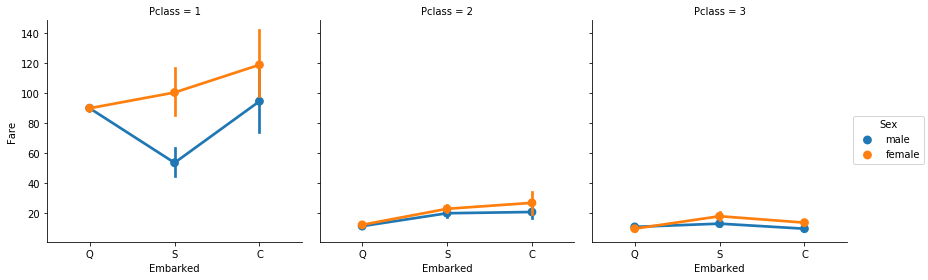

In [111]:
sns.factorplot(x="Embarked", hue="Sex", y="Fare", col="Pclass", data=combinedTitanic)

In [132]:
#Fare
display(combinedTitanic[combinedTitanic['Fare'].isnull()])
combinedTitanic["Fare"].fillna(combinedTitanic.groupby(['Pclass','Sex','Embarked'])["Fare"].transform("median"), inplace=True)
display(combinedTitanic[combinedTitanic['PassengerId'] == 1044 ])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Type,Title
152,1044,3,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,U,Mr


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Type,Title
152,1044,3,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,8.05,NaN,S,U,Mr


#### Cabin :
There are 1014 missing values for cabin, So lets fill a new value,'U'(unknown), for these rows. Also as the Cabin values have the number along with them. We are interested only in cabin type. So we can extract a new column Cabin_type with the first letter of cabin column.

In [131]:
#Cabin
combinedTitanic['Cabin_Type']=combinedTitanic['Cabin'].str.extract('([A-Za-z])',expand=False)
combinedTitanic['Cabin_Type'] = combinedTitanic['Cabin_Type'].fillna('U')

print(combinedTitanic['Cabin_Type'].unique())

['U' 'B' 'E' 'A' 'C' 'D' 'F' 'G' 'T']


#### Age :

Age seems to be greatly depended on sex, marital status etc. So lets derive 'Title' of each person from from the Name column. Then we can fill the missing values using the median of each title.

Also Title seems to have a impact on the survival, So let us keep that column for Modelling.

In [120]:
#Age
combinedTitanic['Title']=combinedTitanic['Name'].str.extract('([A-Za-z]*\.)',expand=False)

titleMap = {'Capt.': 'Crew', 'Col.': 'Crew', 'Dr.': 'Crew', 'Rev.': 'Crew',
'Countess.': 'Mrs', 'Dona.': 'Mrs', 'Lady.': 'Mrs', 'Mrs.': 'Mrs', 'Ms.' : 'Mrs',
'Don.': 'Mr', 'Jonkheer.': 'Mr', 'Major.': 'Mr', 'Mr.': 'Mr', 'Sir.' : 'Mr',
'Miss.': 'Miss', 'Mlle.': 'Miss', 'Mme.': 'Miss',
'Master.' : 'Master'}
combinedTitanic['Title'] = combinedTitanic['Title'].map(titleMap)
print(combinedTitanic.groupby('Title')['Age'].median())

combinedTitanic["Age"].fillna(combinedTitanic.groupby("Title")["Age"].transform("median"), inplace=True)


Title
Crew      49.5
Master     4.0
Miss      22.0
Mr        29.0
Mrs       35.5
Name: Age, dtype: float64


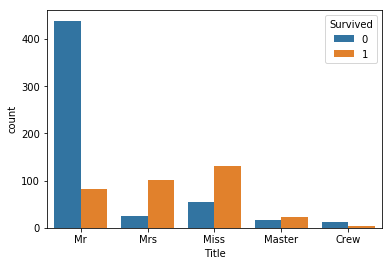

In [121]:
sns.countplot(x='Title',hue='Survived',data=combinedTitanic[combinedTitanic['Survived'] != 3])

In [133]:
combinedTitanic.isnull().sum()


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Cabin_Type        0
Title             0
dtype: int64

### Remove Columns that are not relevant for modelling.

In [134]:
#Remove columns that we  are not using
combinedTitanic = combinedTitanic.drop(['PassengerId','Name','Ticket','Cabin'], axis=1) #,'Cabin'
combinedTitanic.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Type,Title
0,3,3,male,34.5,0,0,7.8292,Q,U,Mr
1,3,3,female,47.0,1,0,7.0000,S,U,Mrs
2,3,2,male,62.0,0,0,9.6875,Q,U,Mr
3,3,3,male,27.0,0,0,8.6625,S,U,Mr
4,3,3,female,22.0,1,1,12.2875,S,U,Mrs


### One-Hot- Encoding

In [135]:
# Do one-hot encoding for all categorical variable
combinedTitanic['Pclass'] = combinedTitanic['Pclass'].map({1 : '1st Class', 2: '2nd Class', 3 : '3rd Class'})
combinedTitanicEncoded = pd.get_dummies(data =  combinedTitanic)
combinedTitanicEncoded.head()


,Survived,Age,SibSp,Parch,Fare,Pclass_1st Class,Pclass_2nd Class,Pclass_3rd Class,Sex_female,Sex_male,...,Cabin_Type_E,Cabin_Type_F,Cabin_Type_G,Cabin_Type_T,Cabin_Type_U,Title_Crew,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
1,3,47.0,1,0,7.0000,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
2,3,62.0,0,0,9.6875,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,3,27.0,0,0,8.6625,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
4,3,22.0,1,1,12.2875,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1


### Normalize Data

In [136]:
#Normalize all the Numeric variables:
#from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
numericCol = ['Age','SibSp','Parch','Fare']
combinedTitanicEncoded[numericCol] = scaler.fit_transform(combinedTitanicEncoded[numericCol] )


combinedTitanicEncoded.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1st Class,Pclass_2nd Class,Pclass_3rd Class,Sex_female,Sex_male,...,Cabin_Type_E,Cabin_Type_F,Cabin_Type_G,Cabin_Type_T,Cabin_Type_U,Title_Crew,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,3,0.430039,0.000,0.000000,0.015282,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
1,3,0.586622,0.125,0.000000,0.013663,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
2,3,0.774521,0.000,0.000000,0.018909,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,3,0.336089,0.000,0.000000,0.016908,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
4,3,0.273456,0.125,0.111111,0.023984,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1


<a id='model'></a>
## Modelling

Here we will using randomforest for our modelling. Before modelling split the data back into testing and training sets. 

In [137]:
testFeatures = (combinedTitanicEncoded[combinedTitanicEncoded['Survived'] == 3 ]).drop('Survived',axis = 1)
trainFeatures = (combinedTitanicEncoded[combinedTitanicEncoded['Survived'] != 3 ]).drop('Survived',axis = 1)
trainlabel = combinedTitanicEncoded[combinedTitanicEncoded['Survived'] != 3 ]['Survived']

print("Test count : {}\n".format(len(testFeatures.index) ))
print("Train features count : {}\n".format(len(trainFeatures.index) ))
print("Train Label : {}\n".format(len(trainlabel.index) ))


Test count : 418

Train features count : 891

Train Label : 891



In [138]:
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(trainFeatures, trainlabel)
pred = clf.predict(testFeatures)
print(pred)

[0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1
 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [140]:
TestOut = titanicTest
TestOut['Survived'] = pred
TestOutput = TestOut[['PassengerId','Survived']]
print(TestOutput)
TestOutput.to_csv('Titanic.csv',index = False)


     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         1
5            897         0
6            898         0
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         1
18           910         0
19           911         0
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         1
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         1
3